## Problem statement 

- Predicting the productivity of the workers in the garment industry based on factors such as idle time , incentive and department so as to analyse the extent of matching demand in the indutry 

## Data Information (Most important)

- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter : A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers : Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity : Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip : Work in progress. Includes the number of unfinished items for products
- over_time : Represents the amount of overtime by each team in minutes
- incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time : The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

## Importing the important libraries

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## Data ingestion 

In [52]:
data = pd.read_csv('product.csv')

In [53]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Null value information 

In [54]:
null_info=data.isnull().sum()   # using the sum() method within the isnull()

In [55]:
null_info

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### We can see that the wip , work in progress column contains a lot of null values , these values need to be treated fairly to continue with the analysis

## Data Preprocessing 


## Null value imputation 

- The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

- Various methods available but , need understand the type of missing value and the significance before we impute the values.

- Filling the null values with mean / median using the fillna if the daya type is numeric 

- Filling the null values with mode if the data type is categorical 

- Removig the column( this is nonly preferrable if there are a large number of nan values in the desired column. also removing the whole column itself shall lead to loss in the information  which impact the accuracy of the model at the end 

### Since the wip is an numeric variable and 506 null values are present we shall try and impute the values based on the median value as mean are more vulnerable to outliers in the data 



In [56]:
data['wip']=data['wip'].fillna(data['wip'].median())  # imputing using the median()

In [57]:
# reverifying the data info

data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### The data set no longer contsins any null value , we can move forward with analysis

## data information  to understand the data types in the data set

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data encoding 

- Label encoder Vs One hot encoder (very important decision !!!)

- label encoder

-  sample oroginal data

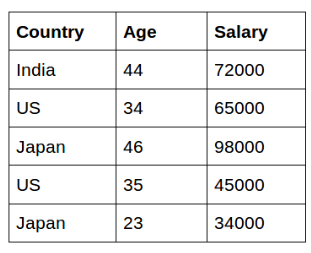

- label endoded : uses the alphateical order to encode the features , this will lead the model to guess that there is a inherent heirarchy in the variables such as in this case , India < Japan < US. Which is not the case !!!

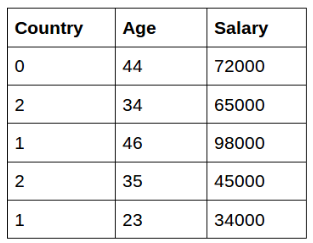

- One hot encoder

- Sample orginal data 

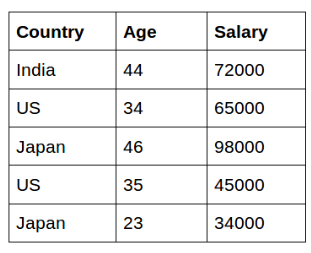

- One hot encoder : This shall create additional unique columns for the categorical columns , this will be creating the dummy variables for the original categorical column 

- Encoded data : this also solves the challenge of inherent ranking of the encoded features , which will be a drawback for the ML model 

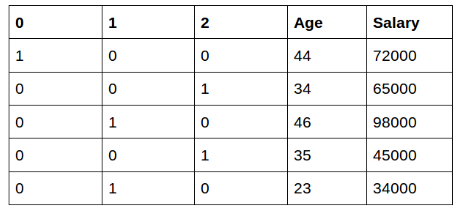


- source : Analytics Vidya




## Removing the unwanted variable 

In [59]:
data=data.drop('date', axis=1) # date is not important for further analysis

In [60]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [61]:
# the quarter is not important so dropping the column  as the column was derived from the year colum

data= data.drop('quarter', axis=1)

In [62]:
data

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


## Data encoding 

In [63]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [65]:
data['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [66]:
# since there is no inherent rank in the department we shall be using one hot encoding to encode the variables 

data=pd.get_dummies(data,columns=['department','day'], drop_first=True)

In [67]:
data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1,0,0,1,0,0
1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333,0,0,0,0,0,0,1
1193,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,0,0,0,0,0,1
1194,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,0,0,0,0,0,1
1195,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889,0,0,0,0,0,0,1


In [68]:
# Deleting the targeted productivity column , we chall focus on the actual productivity of the workers 

data=data.drop('targeted_productivity',axis=1)

In [69]:
data

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1,0,0,1,0,0
1,1,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,1,0,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,1,0,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,1,0,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333,0,0,0,0,0,0,1
1193,8,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,0,0,0,0,0,1
1194,7,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,0,0,0,0,0,1
1195,9,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889,0,0,0,0,0,0,1


In [71]:
#splitting the data into feature and target variable 

X=data.drop('actual_productivity',axis=1)

In [72]:
X

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0,1,0,0,1,0,0
1,1,3.94,1039.0,960,0,0.0,0,0,8.0,1,0,0,0,1,0,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,0,1,0,0,1,0,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0,1,0,0,1,0,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,2.90,1039.0,960,0,0.0,0,0,8.0,0,0,0,0,0,0,1
1193,8,3.90,1039.0,960,0,0.0,0,0,8.0,0,0,0,0,0,0,1
1194,7,3.90,1039.0,960,0,0.0,0,0,8.0,0,0,0,0,0,0,1
1195,9,2.90,1039.0,1800,0,0.0,0,0,15.0,0,0,0,0,0,0,1


In [73]:
y=data['actual_productivity']

In [74]:
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

## Data scaling :

- Data scaling is important to remove magintude bias for the machine learning model 
- Two ways . Standard scaler and min max scaler 
- Decision when to use standard scaler and when to use min max scaler is very important !!!

- Standard scaler : StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

- MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.(we dont have such  knowledge hence , we wont be using this )

- In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset

In [78]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc=StandardScaler()


In [82]:
scaled_X=sc.fit_transform(X)

In [84]:
scaled_X

array([[ 0.45432264,  1.01455214, -0.01319746, ...,  2.2394364 ,
        -0.44922959, -0.45859944],
       [-1.56732865, -1.01677766, -0.06258656, ...,  2.2394364 ,
        -0.44922959, -0.45859944],
       [ 1.32074461, -0.33387786, -0.11340723, ...,  2.2394364 ,
        -0.44922959, -0.45859944],
       ...,
       [ 0.16551531, -1.02043442, -0.06258656, ..., -0.44654092,
        -0.44922959,  2.18055215],
       [ 0.74312996, -1.11185341, -0.06258656, ..., -0.44654092,
        -0.44922959,  2.18055215],
       [-0.12329202, -1.11185341, -0.06258656, ..., -0.44654092,
        -0.44922959,  2.18055215]])

In [88]:
# converting the scaled_x into a data frame

X_scaled=pd.DataFrame(data=scaled_X, columns=X.columns)

In [89]:
X_scaled

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.454323,1.014552,-0.013197,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,-0.522881,0.855729,-0.430289,-0.451913,2.239436,-0.44923,-0.458599
1,-1.567329,-1.016778,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,1.912482,-1.168594,-0.430289,-0.451913,2.239436,-0.44923,-0.458599
2,1.320745,-0.333878,-0.113407,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,-0.522881,0.855729,-0.430289,-0.451913,2.239436,-0.44923,-0.458599
3,1.609552,-0.333878,-0.113407,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,-0.522881,0.855729,-0.430289,-0.451913,2.239436,-0.44923,-0.458599
4,-0.123292,0.990783,0.031181,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,-0.522881,0.855729,-0.430289,-0.451913,2.239436,-0.44923,-0.458599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1.031937,-1.111853,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.522881,-1.168594,-0.430289,-0.451913,-0.446541,-0.44923,2.180552
1193,0.454323,-1.020434,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.522881,-1.168594,-0.430289,-0.451913,-0.446541,-0.44923,2.180552
1194,0.165515,-1.020434,-0.062587,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,-0.522881,-1.168594,-0.430289,-0.451913,-0.446541,-0.44923,2.180552
1195,0.743130,-1.111853,-0.062587,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788,-0.522881,-1.168594,-0.430289,-0.451913,-0.446541,-0.44923,2.180552


## Model selection decision


[]

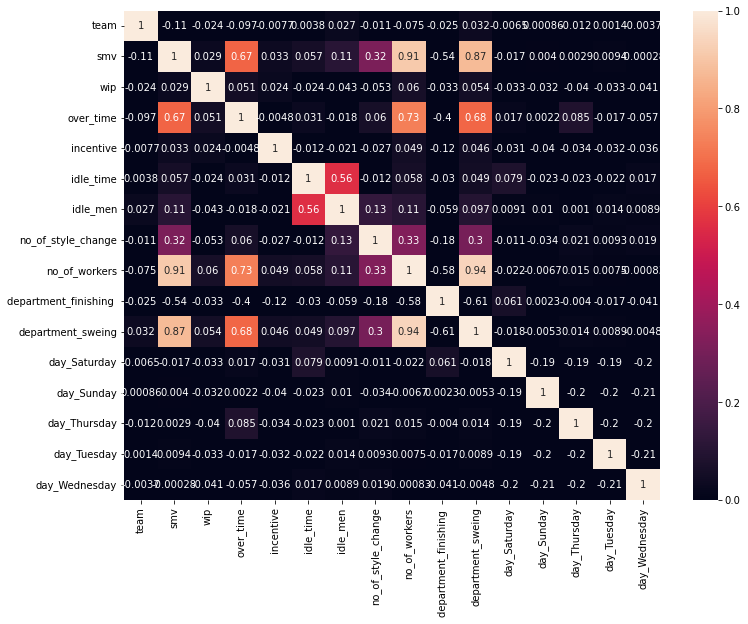

In [93]:
# inorder to best understand the model selection lets see the correlation between the independent feature

plt.figure(figsize=(12,9))
sns.heatmap(X.corr(), annot=True,
                vmin=0, vmax=1)
plt.plot()

# Since there is some amount of correlation exists hence we shall use ridge regression 


In [97]:
from sklearn.linear_model import Ridge

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
xtrain ,xtest , ytrain , ytest = train_test_split(X_scaled, y , test_size=0.2, random_state=10)

In [101]:
model_1=Ridge(alpha=1.0)

In [104]:
model_1.fit(xtrain , ytrain)

Ridge()

In [105]:
predict_1=model_1.predict(xtest)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
mse=mean_squared_error(ytest , predict_1)

In [110]:
mse # very low hence 

0.02642585299425789